# IMPORT REQUIRED LIBRARIES :

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# IMPORT DATA SET :

In [276]:
data=pd.read_csv('Comcast_telecom_complaints_data.csv')

# VIEW HEAD & TAIL OF DATA :

In [277]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [278]:
data.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


# VIEW SHAPE OF DATA

In [279]:
data.shape

(2224, 11)

# VIEW DATA INFORMATION :

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


# VIEW SUMMERY OF THE DATA :

In [281]:
data.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


# FIND OUT THE NULL DATA :

In [282]:
data.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

# 1. PROVIDE THE TREND CHART FOR THE NUMBER OF COMPLAINTS AT MONTHLY AND DAILY GRANULARITY LEVELS :

Split day, month and year from a column :

In [283]:
data['Day'] = pd.DatetimeIndex(data['Date_month_year']).day
data['Month'] = pd.DatetimeIndex(data['Date_month_year']).month
data['Year'] = pd.DatetimeIndex(data['Date_month_year']).year

NUMBER OF COMPLAINTS AT MONTHLY LEVELS :

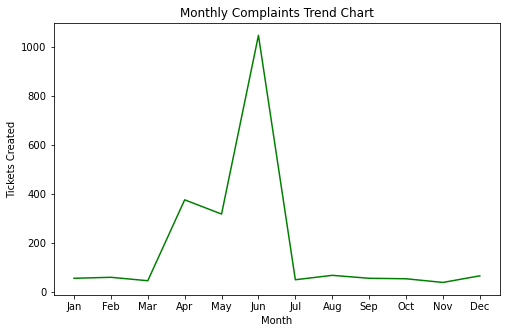

In [284]:
plt.figure(figsize=(8,5))
plt.plot(sorted(data['Month'].unique()), data.groupby(['Month']).size(), color='green')
plt.xticks(sorted(data["Month"].unique()),
['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.xlabel('Month')
plt.ylabel('Tickets Created')
plt.title('Monthly Complaints Trend Chart');

Insights = June Month has Maximun Complaints.

NUMBER OF COMPLAINTS AT DAILY LEVELS :

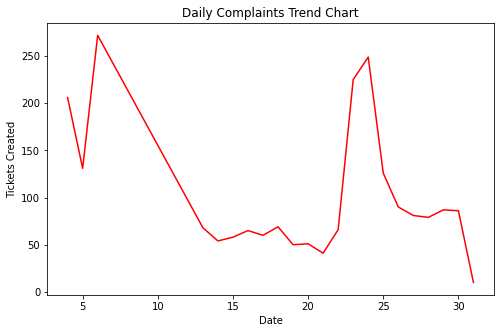

In [285]:
plt.figure(figsize=(8,5))
plt.plot(sorted(data['Day'].unique()), data.groupby(['Day']).size(), color='red')

plt.xlabel('Date')
plt.ylabel('Tickets Created')    
plt.title('Daily Complaints Trend Chart');

# 2. PROVIDE A TABLE WITH THE FREQUENCY OF COMPLAINT TYPES :

In [286]:
data['Customer Complaint'].value_counts(dropna=False)

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

# 3. Which complaint types are maximum i.e., around internet, network issues, or across any other domains :

Internet Issues :

In [287]:
Internet01= data[data['Customer Complaint'].str.contains('network')].count()
Internet02= data[data['Customer Complaint'].str.contains('speed')].count()
Internet03= data[data['Customer Complaint'].str.contains('data')].count()
Internet04= data[data['Customer Complaint'].str.contains('internet')].count()
Internet_Issues=(Internet01+Internet02+Internet03+Internet04)
Internet_Issues

Ticket #                       374
Customer Complaint             374
Date                           374
Date_month_year                374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
Day                            374
Month                          374
Year                           374
dtype: int64

Billing Issue :

In [288]:
Billing01= data[data['Customer Complaint'].str.contains('billing')].count()
Billing02= data[data['Customer Complaint'].str.contains('charge')].count()
Billing_Issues=(Billing01+Billing02)
Billing_Issues

Ticket #                       211
Customer Complaint             211
Date                           211
Date_month_year                211
Time                           211
Received Via                   211
City                           211
State                          211
Zip code                       211
Status                         211
Filing on Behalf of Someone    211
Day                            211
Month                          211
Year                           211
dtype: int64

In [289]:
Service_Issue= data[data['Customer Complaint'].str.contains('service')].count()
Service_Issue

Ticket #                       310
Customer Complaint             310
Date                           310
Date_month_year                310
Time                           310
Received Via                   310
City                           310
State                          310
Zip code                       310
Status                         310
Filing on Behalf of Someone    310
Day                            310
Month                          310
Year                           310
dtype: int64

In [290]:
Total_Issues = (Internet_Issues+Billing_Issues+Service_Issue)
Total_Issues

Ticket #                       895
Customer Complaint             895
Date                           895
Date_month_year                895
Time                           895
Received Via                   895
City                           895
State                          895
Zip code                       895
Status                         895
Filing on Behalf of Someone    895
Day                            895
Month                          895
Year                           895
dtype: int64

In [291]:
Other_Domain_Issues = 2224-Total_Issues
Other_Domain_Issues

Ticket #                       1329
Customer Complaint             1329
Date                           1329
Date_month_year                1329
Time                           1329
Received Via                   1329
City                           1329
State                          1329
Zip code                       1329
Status                         1329
Filing on Behalf of Someone    1329
Day                            1329
Month                          1329
Year                           1329
dtype: int64

Insights = Other Domain Complaints are maximum

# 4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed :

In [292]:
data.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [293]:
data['Current_Status'] = ['Open' if i=='Open' or i=='Pending' else 'Closed' for i in data.Status]
data.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Day,Month,Year,Current_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,6,12,2015,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,24,6,2015,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,23,6,2015,Closed
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,6,1,2015,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,28,6,2015,Open


# 5.  Provide state wise status of complaints in a stacked bar chart :

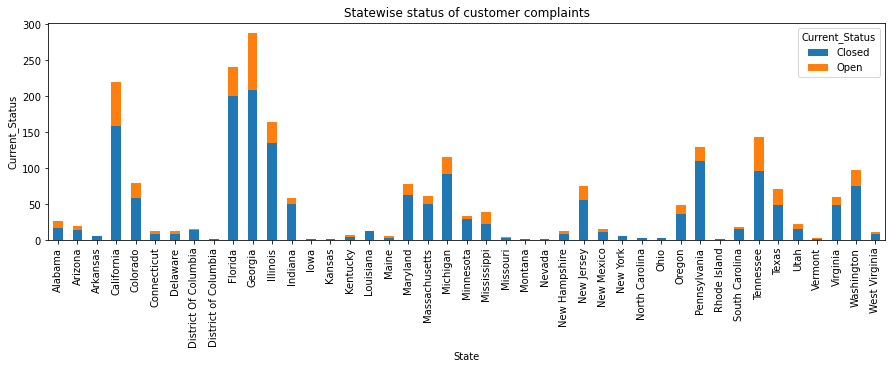

In [294]:
Statewise_Complaints=data.groupby(['State', 'Current_Status']).size().unstack().fillna(0)
Statewise_Complaints.plot.bar(figsize=(15,4),stacked=True)
plt.xlabel('State')
plt.ylabel('Current_Status')
plt.title('Statewise status of customer complaints');

# 6. Which state has the maximum complaints :

In [295]:
data.groupby(['State']).size().sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

Insights = Georgia has maximum complaints

# 7. Which state has the highest percentage of unresolved complaints :

In [296]:
Unresolved_Complaints=data.groupby(['State', 'Current_Status']).size().unstack().fillna(0).sort_values(by='Open', ascending=False).head()
Unresolved_Complaints

Current_Status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0


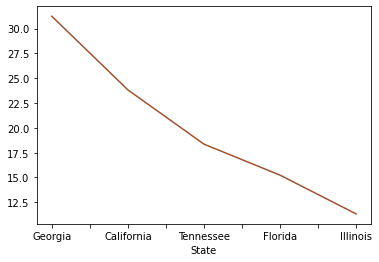

In [297]:
Per_of_Unresolved_Complaints=Unresolved_Complaints['Open'] / Unresolved_Complaints['Open'].sum()*100
Per_of_Unresolved_Complaints.head()
Per_of_Unresolved_Complaints.plot(color='#A0522D');

Insights = Georgia has highest percentage of unresolved complaints

# 8. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls :

In [298]:
Resolved_Complaints=(data.groupby(['Received Via','Current_Status']).size().unstack())
Resolved_Complaints

Current_Status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


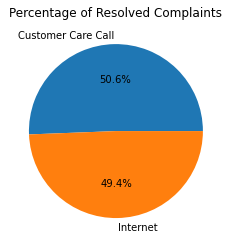

In [299]:
Per_of_Resolved_Complaints = Resolved_Complaints['Closed'] / Resolved_Complaints['Closed'].sum()*100
labels=['Customer Care Call', 'Internet']
Values=['864', '843']
plt.pie(Values, labels=labels, autopct="%.1f%%")
plt.title('Percentage of Resolved Complaints');